In [19]:
import pandas as pd
import numpy as np
import scipy as sc
import scipy.stats as st
import statsmodels.stats.diagnostic as ssd
import statsmodels.formula.api as sm

In [20]:
d = pd.DataFrame({'years': [2001,
2002,
2003,
2004,
2005,
2006,
2007,
2008,
2009,
2010,
2011,
2012,
2013,
2014,
2015,
2016,
2017,
2018,
2019,
2020,
2021,
2022,
2023,
],
'y': [3.75,
3.95,
2.34,
4.05,
3.82,
4.10,
2.42,
2.89,
4.95,
3.68,
2.15,
3.64,
2.85,
4.92,
4.85,
3.78,
3.61,
3.92,
2.57,
3.22,
4.16,
3.72,
2.20
], 'x1': [20.99,
22.71,
16.18,
21.29,
21.00,
20.14,
18.43,
19.55,
24.71,
21.67,
17.14,
18.22,
18.78,
24.88,
25.05,
21.89,
21.16,
22.00,
17.83,
19.16,
22.50,
19.68,
15.89
], 'x2': [6.26,
7.27,
5.85,
7.07,
6.66,
7.02,
6.27,
5.84,
8.20,
7.31,
4.67,
6.96,
6.21,
7.44,
7.75,
6.13,
6.79,
7.42,
6.60,
5.53,
7.57,
6.18,
5.14
], 'x3': [-0.03,
-0.24,
-0.12,
-0.09,
0.34,
0.11,
-0.46,
-0.39,
-0.21,
0.16,
-0.07,
0.10,
-0.36,
0.09,
-0.34,
-0.10,
-0.19,
0.04,
0.09,
0.24,
-0.45,
0.17,
-0.20
]})

In [21]:
d

,years,y,x1,x2,x3
0,2001,3.75,20.99,6.26,-0.03
1,2002,3.95,22.71,7.27,-0.24
2,2003,2.34,16.18,5.85,-0.12
3,2004,4.05,21.29,7.07,-0.09
4,2005,3.82,21.00,6.66,0.34
5,2006,4.10,20.14,7.02,0.11
6,2007,2.42,18.43,6.27,-0.46
7,2008,2.89,19.55,5.84,-0.39
8,2009,4.95,24.71,8.20,-0.21
9,2010,3.68,21.67,7.31,0.16


In [22]:
#df = pd.DataFrame('x1', columns = df.x1)
df = d.drop(["years"], axis = 1)

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


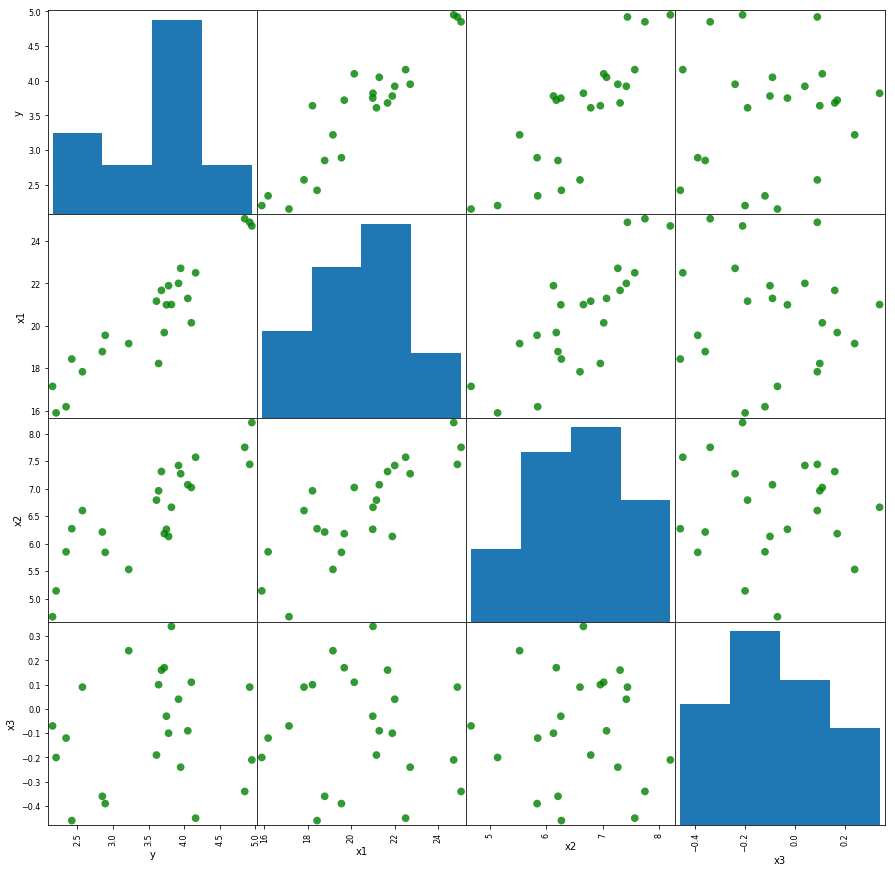

In [23]:
grr = pd.scatter_matrix(df, c = 'g', figsize=(15, 15), marker = 'o', hist_kwds={'bins': 4}, s=60, alpha=.8)

In [24]:
model1_1 = sm.ols(formula='y ~ x1', data = df)
fitted1_1 = model1_1.fit()
y_krushe4ka = fitted1_1.predict(df[["x1"]])
fitted1_1.summary()
np.linalg.norm(df.y - y_krushe4ka) ** 2
print(st.shapiro(df.y - y_krushe4ka))
print(st.mstats.normaltest(df.y - y_krushe4ka))
print(st.kstest(df.y - y_krushe4ka, 'norm'))
print("PAGAN:", ssd.het_breuschpagan(fitted1_1.resid, fitted1_1.model.exog))

(0.9385740160942078, 0.1674681305885315)
NormaltestResult(statistic=4.617898723757854, pvalue=0.09936559401796372)
KstestResult(statistic=0.3045179395342221, pvalue=0.021719774153234894)
PAGAN: (1.9746165898071397, 0.15995868846978573, 1.9722326854618613, 0.17482918844082793)


In [25]:
model1_2 = sm.ols(formula='y ~ x2', data = df)
fitted1_2 = model1_2.fit()
fitted1_2.summary()
y_krushe4ka = fitted1_2.predict(df[["x2"]])
print(st.shapiro(df.y - y_krushe4ka))
print(st.mstats.normaltest(df.y - y_krushe4ka))
print(st.kstest(df.y - y_krushe4ka, 'norm'))
print("PAGAN:", ssd.het_breuschpagan(fitted1_2.resid, fitted1_2.model.exog))

(0.9684308767318726, 0.6514954566955566)
NormaltestResult(statistic=0.7689149934097735, pvalue=0.6808198830666541)
KstestResult(statistic=0.24046184465117204, pvalue=0.11791094425158954)
PAGAN: (0.30309689675058427, 0.5819474269064434, 0.28043626933627763, 0.6019695801010223)


In [26]:
model1_3 = sm.ols(formula='y ~ x3', data = df)
fitted1_3 = model1_3.fit()
fitted1_3.summary()
y_krushe4ka = fitted1_3.predict(df[["x3"]])
print(st.shapiro(df.y - y_krushe4ka))
print(st.mstats.normaltest(df.y - y_krushe4ka))
print(st.kstest(df.y - y_krushe4ka, 'norm'))
print("PAGAN:", ssd.het_breuschpagan(fitted1_3.resid, fitted1_3.model.exog))

(0.9530288577079773, 0.33773958683013916)
NormaltestResult(statistic=0.36676003157183706, pvalue=0.8324517508151409)
KstestResult(statistic=0.156377615966113, pvalue=0.5877233992481767)
PAGAN: (2.1754241916909542, 0.1402308455080709, 2.1937497525055027, 0.1534209222423675)


In [27]:
model2_1 = sm.ols(formula='y ~ x1 + x2', data = pd.DataFrame({"y":df.y, "x1":df.x1, "x2":df.x2}))
fitted2_1 = model2_1.fit()
fitted2_1.summary()
y_krushe4ka = fitted2_1.predict()
print(st.shapiro(df.y - y_krushe4ka))
print(st.mstats.normaltest(df.y - y_krushe4ka))
print(st.kstest(df.y - y_krushe4ka, 'norm'))
print("PAGAN:", ssd.het_breuschpagan(fitted2_1.resid, fitted2_1.model.exog))

(0.9726212024688721, 0.7514153122901917)
NormaltestResult(statistic=0.35646692995321994, pvalue=0.8367470495528174)
KstestResult(statistic=0.31732539267258053, pvalue=0.014723752842050741)
PAGAN: (5.9274048829792125, 0.05162741539466325, 3.4718827702238406, 0.05078284758746364)


In [28]:
model2_2 = sm.ols(formula='y ~ x2 +x3', data = pd.DataFrame({"y":df.y, "x2":df.x2, "x3":df.x3}))
fitted2_2 = model2_2.fit()
fitted2_2.summary()
y_krushe4ka = fitted2_2.predict()
print(st.shapiro(df.y - y_krushe4ka))
print(st.mstats.normaltest(df.y - y_krushe4ka))
print(st.kstest(df.y - y_krushe4ka, 'norm'))
print("PAGAN:", ssd.het_breuschpagan(fitted2_2.resid, fitted2_2.model.exog))

(0.9578100442886353, 0.4206048548221588)
NormaltestResult(statistic=2.187221936241546, pvalue=0.3350046160089617)
KstestResult(statistic=0.2602234631429645, pvalue=0.07313015204401196)
PAGAN: (0.6437235803506046, 0.7247983576616424, 0.2879386389161046, 0.7528636814671342)


In [29]:
model2_3 = sm.ols(formula='y ~ x1 +x3', data = pd.DataFrame({"y":df.y, "x1":df.x1, "x3":df.x3}))
fitted2_3 = model2_3.fit()
fitted2_3.summary()
y_krushe4ka = fitted2_3.predict()
print(st.shapiro(df.y - y_krushe4ka))
print(st.mstats.normaltest(df.y - y_krushe4ka))
print(st.kstest(df.y - y_krushe4ka, 'norm'))
print("PAGAN:", ssd.het_breuschpagan(fitted2_3.resid, fitted2_3.model.exog))

(0.9435526132583618, 0.21408045291900635)
NormaltestResult(statistic=2.7926962352329725, pvalue=0.24749915339228212)
KstestResult(statistic=0.3467426052023519, pvalue=0.005644464421317608)
PAGAN: (3.2876658601499766, 0.19323795344869232, 1.6678216982451115, 0.2138465074247268)


In [30]:
model3_1 = sm.ols(formula='y ~ x1 + x2 + x3', data = pd.DataFrame({"y":df.y, "x1":df.x1, "x2":df.x2, "x3":df.x3}))
fitted3_1 = model3_1.fit()
fitted3_1.summary()
y_krushe4ka = fitted3_1.predict()
print(st.shapiro(df.y - y_krushe4ka))
print(st.mstats.normaltest(df.y - y_krushe4ka))
print(st.kstest(df.y - y_krushe4ka, 'norm'))
print("PAGAN:", ssd.het_breuschpagan(fitted3_1.resid, fitted3_1.model.exog))

(0.9728464484214783, 0.7567059397697449)
NormaltestResult(statistic=0.49090425285354955, pvalue=0.782350736823285)
KstestResult(statistic=0.33786758427512886, pvalue=0.007611868516567588)
PAGAN: (12.705592939043504, 0.005318530225778685, 7.816745034864798, 0.0013434880552804047)


In [31]:
x1 = 5
model1_1 = sm.ols(formula='y ~ x1', data = df)
fitted1_1 = model1_1.fit()
y_krushe4ka = fitted1_1.predict(df[["x1"]])
print(fitted1_1.summary())
np.linalg.norm(df.y - y_krushe4ka) ** 2
print(st.shapiro(df.y - y_krushe4ka))
print(st.mstats.normaltest(df.y - y_krushe4ka))
print(st.kstest(df.y - y_krushe4ka, 'norm'))
print("PAGAN:", ssd.het_breuschpagan(fitted1_1.resid, fitted1_1.model.exog)[1])
print(y_krushe4ka)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     131.8
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           1.64e-10
Time:                        12:53:57   Log-Likelihood:                -5.2658
No. Observations:                  23   AIC:                             14.53
Df Residuals:                      21   BIC:                             16.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6088      0.540     -4.830      0.0

In [32]:
var = 5*fitted1_1.params[1]+fitted1_1.params[0]
var

-1.1057423443885086

In [33]:
d

,years,y,x1,x2,x3
0,2001,3.75,20.99,6.26,-0.03
1,2002,3.95,22.71,7.27,-0.24
2,2003,2.34,16.18,5.85,-0.12
3,2004,4.05,21.29,7.07,-0.09
4,2005,3.82,21.00,6.66,0.34
5,2006,4.10,20.14,7.02,0.11
6,2007,2.42,18.43,6.27,-0.46
7,2008,2.89,19.55,5.84,-0.39
8,2009,4.95,24.71,8.20,-0.21
9,2010,3.68,21.67,7.31,0.16


In [34]:
d_ = np.array([5])@np.linalg.inv(d[['x1']].T.as_matrix()@d[['x1']].as_matrix())@np.array([5])
d_

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.0025544165571068887

In [35]:
fitted1_1.params

Intercept   -2.608792
x1           0.300610
dtype: float64

In [36]:
import scipy as sp
t = sp.stats.t.ppf(1-0.05/2, len(d)-3)
var-t*(fitted1_1.scale*d_)**0.5,var+t*(fitted1_1.scale*d_)**0.5 

(-1.1393083381600921, -1.072176350616925)